In [33]:
import numpy as np
import pandas as pd
from astropy.io import fits
from astropy.wcs import WCS

import matplotlib.pyplot as plt

In [24]:
cat_path = '/home/zheng/Documents/PIA2023a/sex/hm3/st001-M101-20230525-0001_002460090.0267476854_0002.00000.cat'
df = pd.read_fwf(cat_path, skiprows=19, header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1,2.256003e+07,2538.0260,-18.3833,0.0001,2.133785e+07,1232.3450,-18.3229,0.0001,2.208693e+07,1639.1490,-18.3603,0.0001,787.6991,52.13654,4281.8789,110.6922,210.707993,54.665951
1,2,3.968470e+06,1640.2540,-16.4966,0.0004,3.860116e+06,1232.2670,-16.4665,0.0003,3.883051e+06,1289.3180,-16.4729,0.0004,780.4581,52.13654,7375.7109,81.9464,211.260314,54.668314
2,3,9.255527e+05,1203.5400,-14.9160,0.0014,9.232747e+05,1232.1300,-14.9133,0.0014,9.187104e+05,1181.2500,-14.9079,0.0014,779.9744,52.13654,3348.5620,103.5572,210.541382,54.666377
3,4,5.169864e+04,599.0032,-11.7837,0.0126,6.442722e+04,1232.0710,-12.0227,0.0208,6.268774e+04,1055.3980,-11.9930,0.0183,777.7241,52.13654,3378.6279,28.2277,210.546690,54.674166
4,5,7.784760e+03,301.0104,-9.7281,0.0420,1.247488e+04,951.7009,-10.2401,0.0829,1.185363e+04,664.9538,-10.1846,0.0609,762.5840,52.13654,612.4097,3.5488,210.052793,54.674471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,641,6.127183e+02,104.2731,-6.9682,0.1848,9.634608e+03,1231.8550,-9.9596,0.1389,4.448578e+03,515.5399,-9.1206,0.1259,783.3297,52.13654,754.0858,5419.9937,210.088675,54.115595
641,642,9.375148e+03,335.1910,-9.9299,0.0388,1.918456e+04,1232.2470,-10.7074,0.0698,1.678066e+04,924.1886,-10.5620,0.0598,799.8804,52.13654,3942.4856,5976.9526,210.650510,54.060340
642,643,1.397398e+03,147.4644,-7.8633,0.1146,8.914109e+03,1231.9920,-9.8752,0.1501,3.496000e+03,390.1541,-8.8589,0.1212,802.5770,52.13654,8519.1875,5644.5854,211.456015,54.093280
643,644,2.245116e+03,193.5226,-8.3781,0.0936,1.018931e+04,1232.0710,-10.0204,0.1313,6.504273e+03,673.9766,-9.5330,0.1125,806.1887,52.13654,4861.2144,5518.9790,210.812055,54.107768


In [25]:
flux_arr = df.iloc[:, 9]
fluxerr_arr = df.iloc[:, 10]
ra_arr = df.iloc[:, 17]
dec_arr = df.iloc[:, 18]
x_arr = df.iloc[:, 15]
y_arr = df.iloc[:, 16]

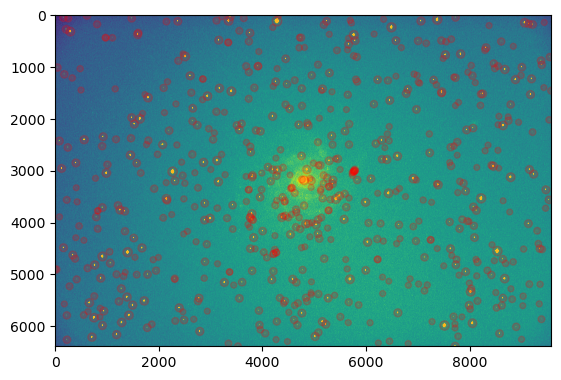

In [29]:
img_path = '/home/zheng/Documents/PIA2023a/data/st001-20230525-test/st001-M101-20230525-0001.fit'
data = fits.getdata(img_path)
vmin = np.percentile(data, 5)
vmax = np.percentile(data, 95)

fig = plt.figure()
ax = fig.add_subplot(111, projection=)

plt.scatter(x_arr, y_arr, color='r', marker='o', s=np.log(flux_arr)*3, alpha=0.2)
plt.imshow(data, vmin=vmin, vmax=vmax)
plt.show()
plt.close()

/home/zheng/anaconda3/envs/pia2023a/lib/python3.11/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 60089.526748 from DATE-OBS'.
  warnings.warn(


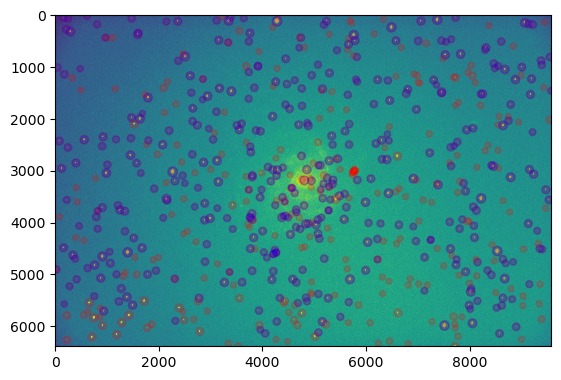

In [40]:
img_path = '/home/zheng/Documents/PIA2023a/data/st001-20230525-test/st001-M101-20230525-0001.fit'
data = fits.getdata(img_path)
header = fits.getheader(img_path)
vmin = np.percentile(data, 5)
vmax = np.percentile(data, 95)

df_matched_gaia = pd.read_csv('/home/zheng/Documents/PIA2023a/homework/test_matched_gaia.csv')
x_gaia_arr = df_matched_gaia.iloc[:, 15]
y_gaia_arr = df_matched_gaia.iloc[:, 16]
flux_raw_gaia_arr = df_matched_gaia.iloc[:, 9]

wcs = WCS(header)

ax = plt.subplot()

plt.scatter(x_arr, y_arr, color='r', marker='o', s=np.log(flux_arr)*3, alpha=0.2)
plt.scatter(x_gaia_arr, y_gaia_arr, color='b', marker='o', s=np.log(flux_raw_gaia_arr)*3, alpha=0.2)
plt.imshow(data, vmin=vmin, vmax=vmax)
plt.show()
plt.close()